<h1><center>Assignment II - Streaming Data Analytics</center></h1>

## Group No : 62

## Group Members:

1. Rahul Kumar (2021sc04671@wilp.bits-pilani.ac.in)
2. Soumyadipta Maiti (2021sc04237@wilp.bits-pilani.ac.in)

<h3>Exercise 1</h3>

<h4>Problem Statement</h4>

Assume that you are working as analyst for “Pizzario”, a pizza delivery chain. The group has collected some interesting characteristics of customers who had purchased their pizza earlier (pizza_customers.csv file). The marketing team is planning a campaign to increase the sales of a newly launched pizza. Before that they want to analyze the segmentation of existing customers so that they can have the clearer picture about the customer categories.

Write a Python program that will take the pizza customers dataset as input and produce the clusters which represents the customer segments present in the dataset. <br>
•	You may like to do some preprocessing on the given dataset. <br>
•	You have to write your own code matching to the problem statement. <br>
•	Add comments at appropriate place so that it’s easy to understand your thought process. <br>
•	You are supposed to use k-means clustering algorithm (custom implementation not from any library) for customer segmentations. <br>
•	The program should clearly output the cluster number, centroid used and number of records belonging to that cluster. <br>
•	The final clusters should be preserved in such a way that it can be used in following exercises. <br>

Your marketing team is now aware about the spending behavior of your customers. Wear hat of marketing professional and think of marketing strategy to attract these customers to your newly launched pizza. 

<h4>Import of Packages</h4>

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action = 'ignore')

C:\Users\0394D9744\Anaconda3\envs\mtech\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\0394D9744\Anaconda3\envs\mtech\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\0394D9744\Anaconda3\envs\mtech\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<h4>Data Load from provided csv file</h4>

In [2]:
df_pizza_customers = pd.read_csv("pizza_customers.csv")
df_pizza_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h4>Data Analysis</h4>

In [3]:
df_pizza_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df_pizza_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<h4>Data Pre-Processing</h4>

In [5]:
no_customerid = df_pizza_customers['CustomerID'].nunique()
print(f'Number of unique CustomerID = {no_customerid}')

Number of unique CustomerID = 200


In [6]:
rows_df = df_pizza_customers.shape[0]
print(f'Number of rows of dataset = {rows_df}')

Number of rows of dataset = 200


In [7]:
if no_customerid == rows_df:
    print('Column for CustomerID can be ignored as it is unique for each row')

Column for CustomerID can be ignored as it is unique for each row


In [8]:
df_pc = df_pizza_customers.copy(deep=True)
df_pc.drop('CustomerID', axis=1, inplace=True)
df_pc.tail(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


<h4>One-Hot Encoding of Categorical Variable "Gender"</h4>

In [9]:
df_pc_encoded = pd.get_dummies(data=df_pc, columns=['Gender'])
df_pc_encoded.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


<h4>Scaling of Numerical Attributes using StandardScaler</h4>

In [10]:
# Standardize the features
scaler = StandardScaler()
df_pc_scaled1 = scaler.fit_transform(df_pc_encoded)
df_pc_scaled = pd.DataFrame(df_pc_scaled1, columns=df_pc_encoded.columns)
df_pc_scaled.tail(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
195,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152
199,-0.635135,2.917671,1.273347,-1.128152,1.128152


<h4>Determination of Optimum Value of Clusters(k) via Elbow Method</h4>

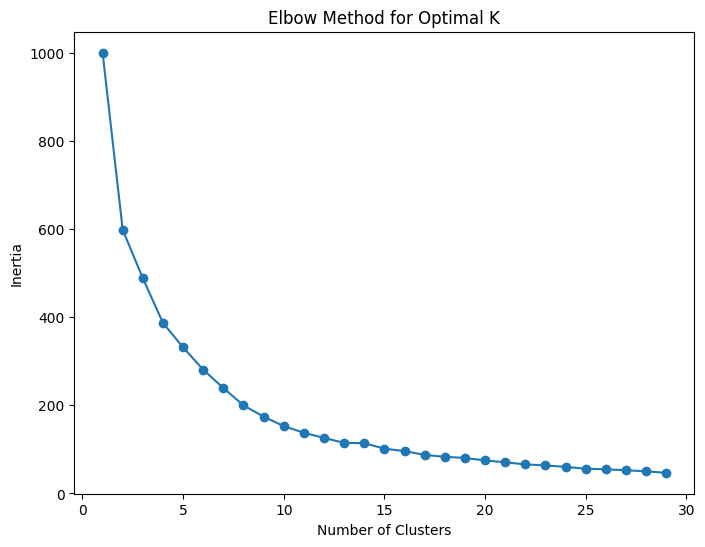

In [11]:
# Calculate inertia for a range of K values
inertia = []
silhouette_scores = []

for k in range(1, 30):
    kmc_model = KMeans(n_clusters=k, init='k-means++',random_state=42)
    kmc_model.fit(df_pc_scaled)
    inertia.append(kmc_model.inertia_)
    
    
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 30), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In above graph, inertia values for different numbers of clusters are plotted. The "elbow" point indicates the optimal number of clusters.<br>
**So, Optimal Value of numbers of clusters is set as 15.**

<h4>Silhouette Score</h4>

In [12]:
df_pc_scaled_sc = df_pc_scaled.copy(deep=True)
df_pc_scaled_sc.tail(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
195,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152
199,-0.635135,2.917671,1.273347,-1.128152,1.128152


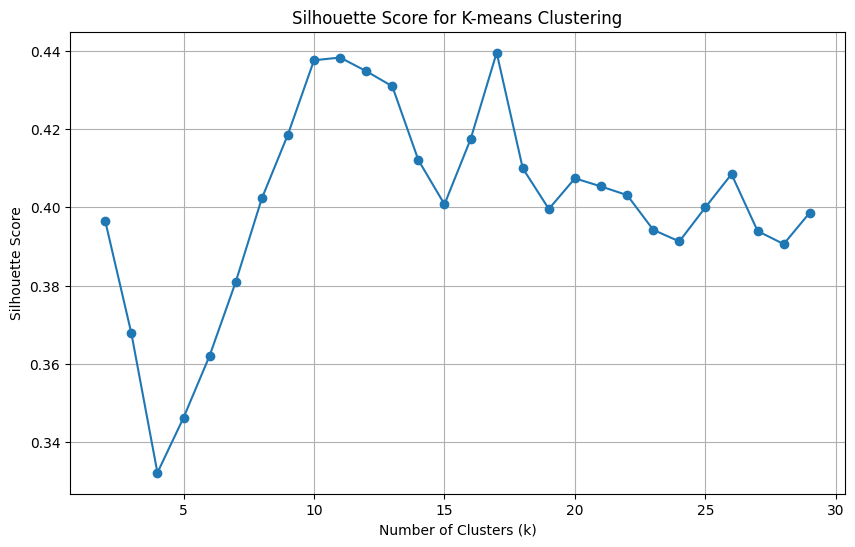

In [13]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(1, 30):
    kmc_model_sc = KMeans(n_clusters=k, init='k-means++',random_state=42)
    
    labels = kmc_model_sc.fit_predict(df_pc_scaled_sc)

    # Ensure there are at least two unique labels before calculating silhouette score
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(df_pc_scaled_sc, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)
    
# Plotting the silhouette scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), silhouette_scores, marker='o')
plt.title('Silhouette Score for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [14]:
# Filter out None values
valid_silhouette_scores = [score for score in silhouette_scores if score is not None]

# Find the maximum score and its corresponding index
max_score = max(valid_silhouette_scores)
best_num_clusters = silhouette_scores.index(max_score) + 2  # Adding 2 to account for starting k value

print(f"The number of clusters with maximum Silhouette Score: {best_num_clusters}")


The number of clusters with maximum Silhouette Score: 18


But, As per problem statement appropriate labeling is required for each clusters, we would prefer not to make number of cluster more than 5. Having 5 clusters will be perfect for their proper labeling.

Additionally, attribute 'Gender' does not have much impact in Clustering, hence, dropping same while modeling.

In [15]:
# From above co-relation, it's evident that  Gender have least co-relation
corr_matx = df_pc_scaled.corr()
corr_matx

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
Age,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,0.058109,-0.058109
Gender_Female,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Gender_Male,0.060867,0.056410,-0.058109,-1.000000,1.000000


In [16]:
df_pc_scaled_sm = df_pc_scaled.copy(deep=True)

In [17]:
df_pc_scaled_sm.drop(['Gender_Female', 'Gender_Male'], axis=1, inplace=True)
df_pc_scaled_sm.tail(5)

,Age,Annual Income (k$),Spending Score (1-100)
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054
199,-0.635135,2.917671,1.273347


<h4>Clustering using no of Clusters (k) = 5</h4>

In [18]:
optimal_cluster = 5
model_kmc = KMeans(optimal_cluster, init='k-means++',random_state=42)
model_kmc.fit(df_pc_scaled_sm)

KMeans(n_clusters=5, random_state=42)

In [19]:
df_pc_scaled_sm['Cluster']=model_kmc.labels_
df_pc_scaled_sm.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1


<h4>Centroid of Clusters</h4>

In [20]:
# Print the cluster centers
print("Cluster Centers:")
cluster_centers = model_kmc.cluster_centers_
# print(scaler.inverse_transform(cluster_centers))
print(cluster_centers)

Cluster Centers:
[[ 0.5310735  -1.2905084  -1.23646671]
 [-0.98067852 -0.74305983  0.46744035]
 [-0.42880597  0.97484722  1.21608539]
 [ 0.07333084  0.97494509 -1.19729675]
 [ 1.20484056 -0.23577338 -0.05236781]]


<h4>Number of Records for each Cluster</h4>

In [21]:
df_pc_scaled_sm['Cluster'].value_counts()

1    54
4    47
2    40
3    39
0    20
Name: Cluster, dtype: int64

<h4>Update of csv file with cluster info</h4>

The final clusters should be preserved in such a way that it can be used in following exercises

In [22]:
df_pizza_customers['Cluster'] = df_pc_scaled_sm['Cluster']
df_pizza_customers.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [23]:
# Write-back updated DataFrame to a CSV file
df_pizza_customers.to_csv('pizza_customers_updated.csv', index=False)

<h4>Visualization of Clusters</h4>

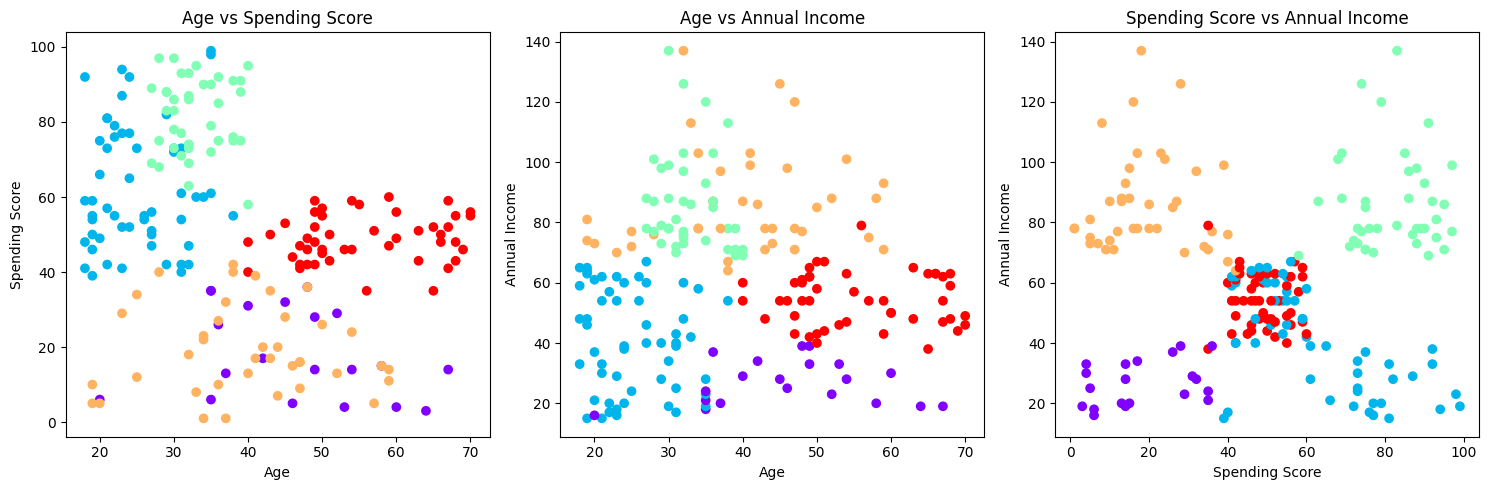

In [24]:
# Create a figure and multiple subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))



# Scatter plot on the first subplot
axs[0].scatter(df_pizza_customers['Age'], df_pizza_customers['Spending Score (1-100)'], 
            c=df_pizza_customers['Cluster'], cmap='rainbow')
axs[0].set_title('Age vs Spending Score')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Spending Score')

# Scatter plot on the second subplot
axs[1].scatter(df_pizza_customers['Age'], df_pizza_customers['Annual Income (k$)'], 
            c=df_pizza_customers['Cluster'], cmap='rainbow')
axs[1].set_title('Age vs Annual Income')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Annual Income')

# Scatter plot on the third subplot
axs[2].scatter(df_pizza_customers['Spending Score (1-100)'], df_pizza_customers['Annual Income (k$)'], 
            c=df_pizza_customers['Cluster'], cmap='rainbow')
axs[2].set_title('Spending Score vs Annual Income')
axs[2].set_xlabel('Spending Score')
axs[2].set_ylabel('Annual Income')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

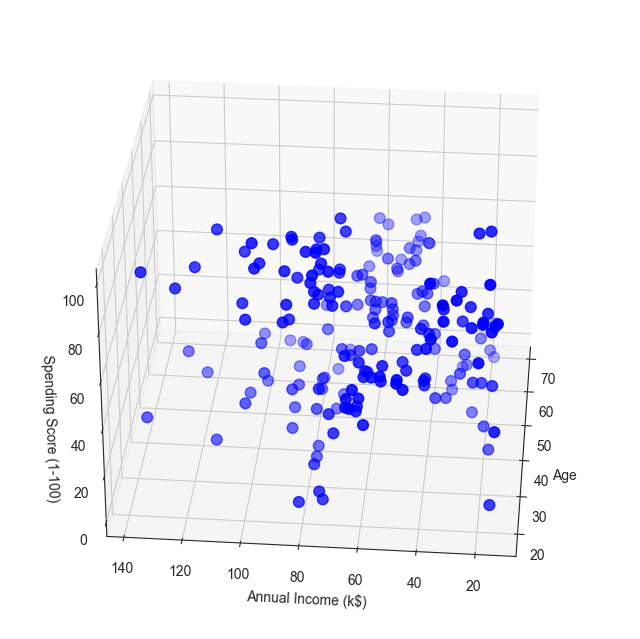

In [25]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pizza_customers.Age, df_pizza_customers["Annual Income (k$)"], df_pizza_customers["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

<IPython.core.display.Javascript object>


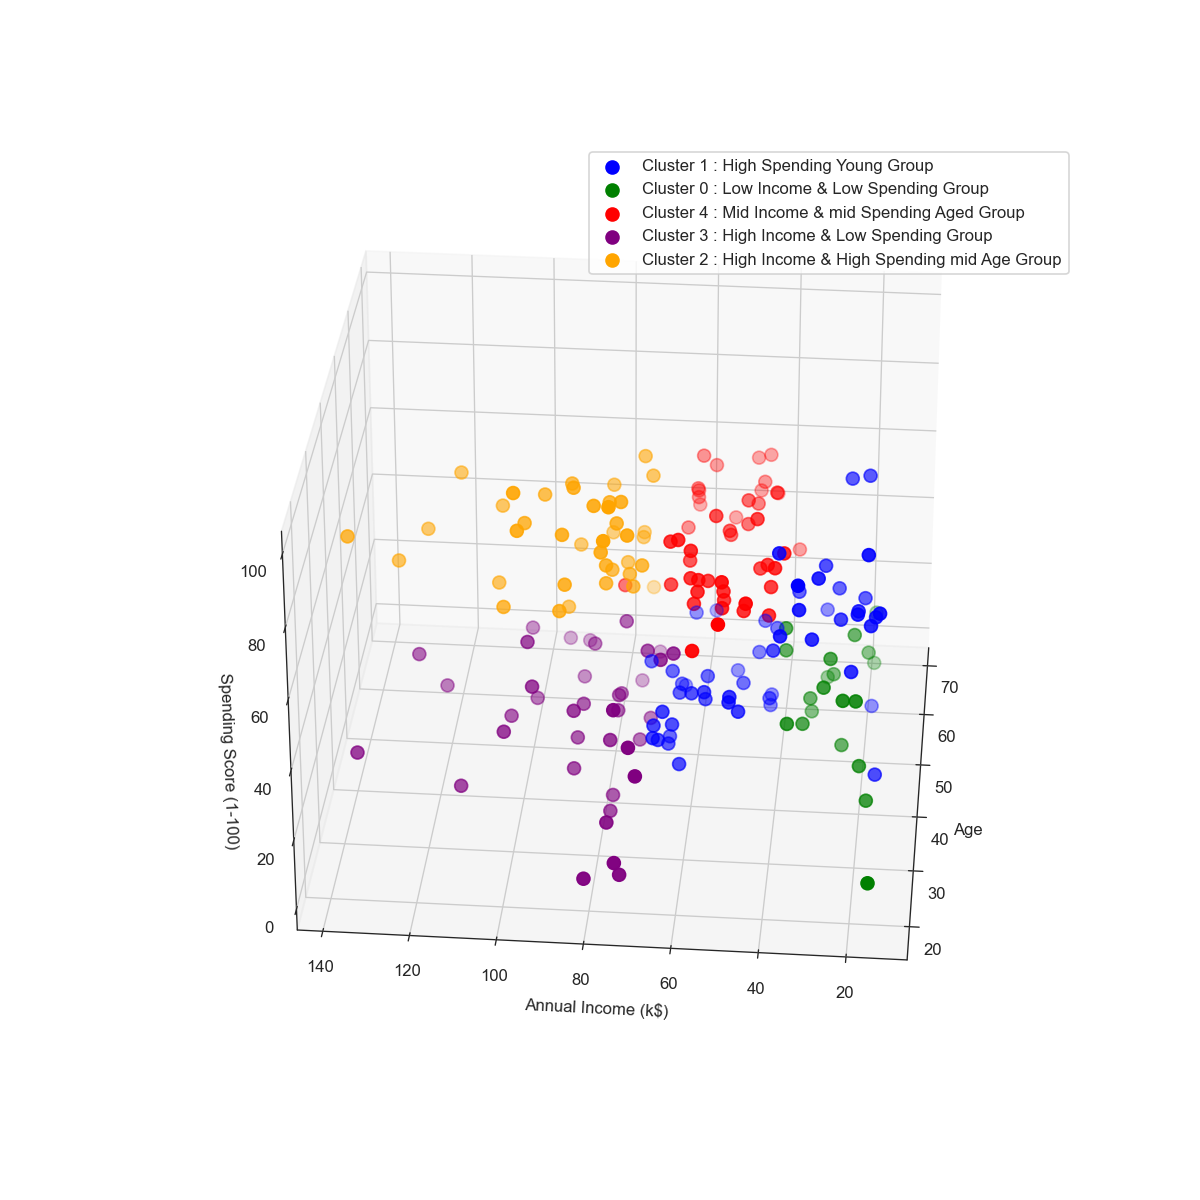

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Define a color map for the clusters
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Iterate through clusters and plot points with different colors
# cluster_legend_labels = {
#     0: 'Low Income & Low Spending Group',
#     1: 'High Spending Young Group',
#     2: 'High Income & High Spending mid Age Group',
#     3: 'High Income & Low Spending Group',
#     4: 'Mid Income & mid Spending Aged Group'
# }
legend_list = [
'Cluster 1 : High Spending Young Group', 
'Cluster 0 : Low Income & Low Spending Group',
'Cluster 4 : Mid Income & mid Spending Aged Group',
'Cluster 3 : High Income & Low Spending Group',
'Cluster 2 : High Income & High Spending mid Age Group'
]


# Iterate through clusters and plot points with different colors
for cluster, color in zip(df_pizza_customers['Cluster'].unique(), colors):
    cluster_data = df_pizza_customers[df_pizza_customers['Cluster'] == cluster]
    ax.scatter(
        cluster_data.Age,
        cluster_data["Annual Income (k$)"],
        cluster_data["Spending Score (1-100)"],
        c=color,
        s=60,
        label=f'Cluster {cluster}'
    )
    

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')


plt.legend(legend_list)

plt.show()

<IPython.core.display.Javascript object>


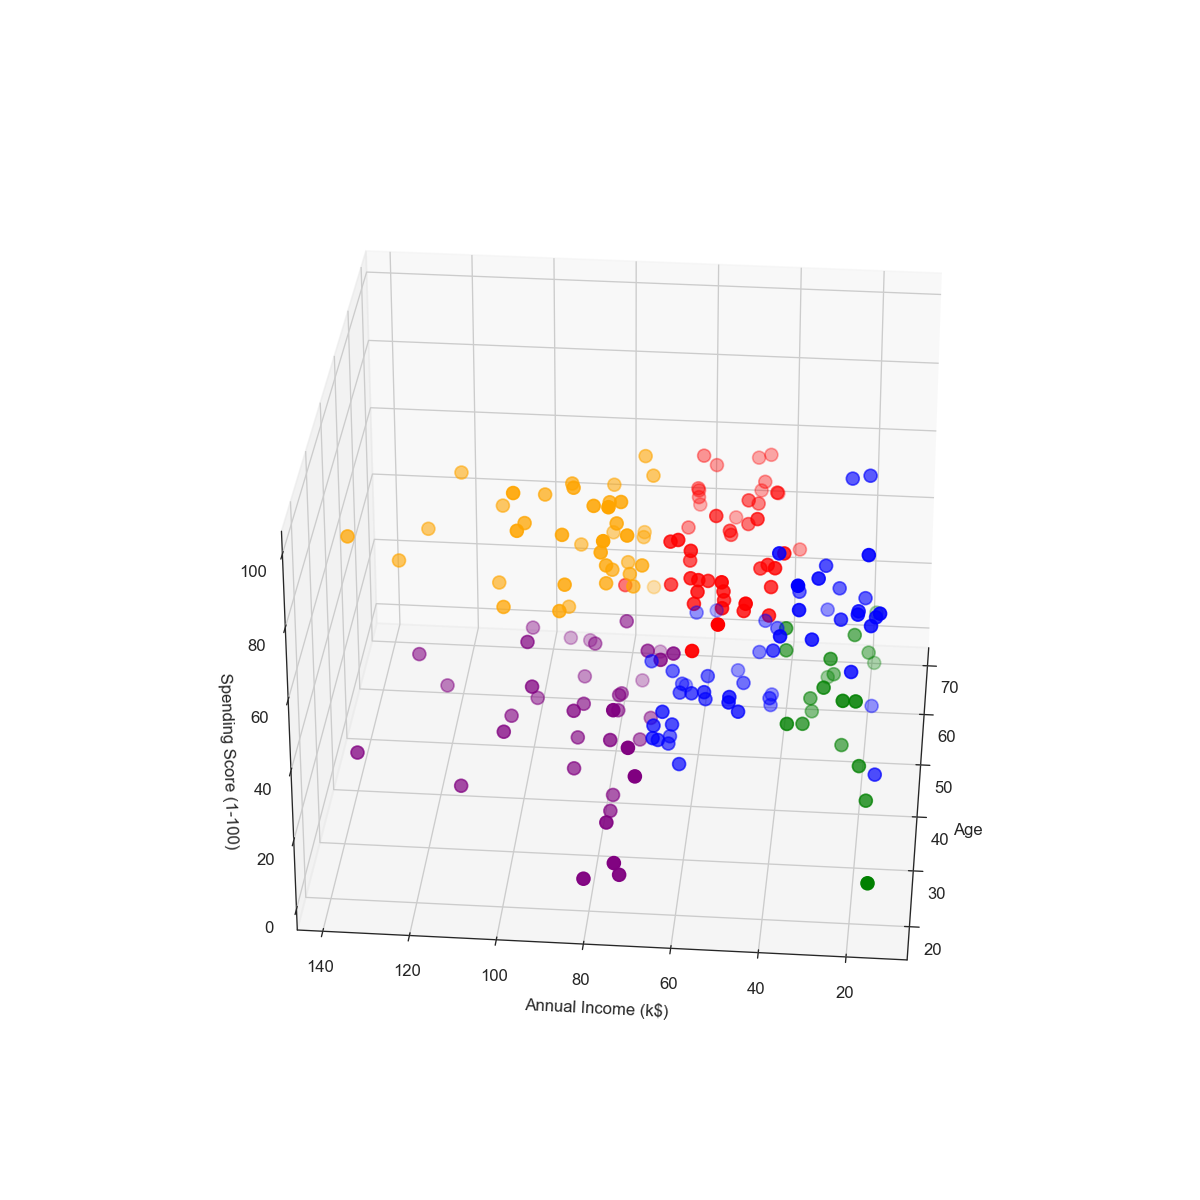

ValueError: too many values to unpack (expected 2)

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Define a color map for the clusters
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Iterate through clusters and plot points with different colors
cluster_legend_labels = {
    0: 'Low Income & Low Spending Group',
    1: 'High Spending Young Group',
    2: 'High Income & High Spending mid Age Group',
    3: 'High Income & Low Spending Group',
    4: 'Mid Income & mid Spending Aged Group'
}

for cluster, color in zip(df_pizza_customers['Cluster'].unique(), colors):
    cluster_data = df_pizza_customers[df_pizza_customers['Cluster'] == cluster]
    ax.scatter(
        cluster_data.Age,
        cluster_data["Annual Income (k$)"],
        cluster_data["Spending Score (1-100)"],
        c=color,
        s=60,
        label=cluster_legend_labels[cluster]  # Use the custom legend label
    )

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

# Display a custom legend
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for cluster, (label, color) in cluster_legend_labels.items()]
ax.legend(handles=custom_legend, loc='upper left', title='Cluster Labels')

plt.show()


<IPython.core.display.Javascript object>


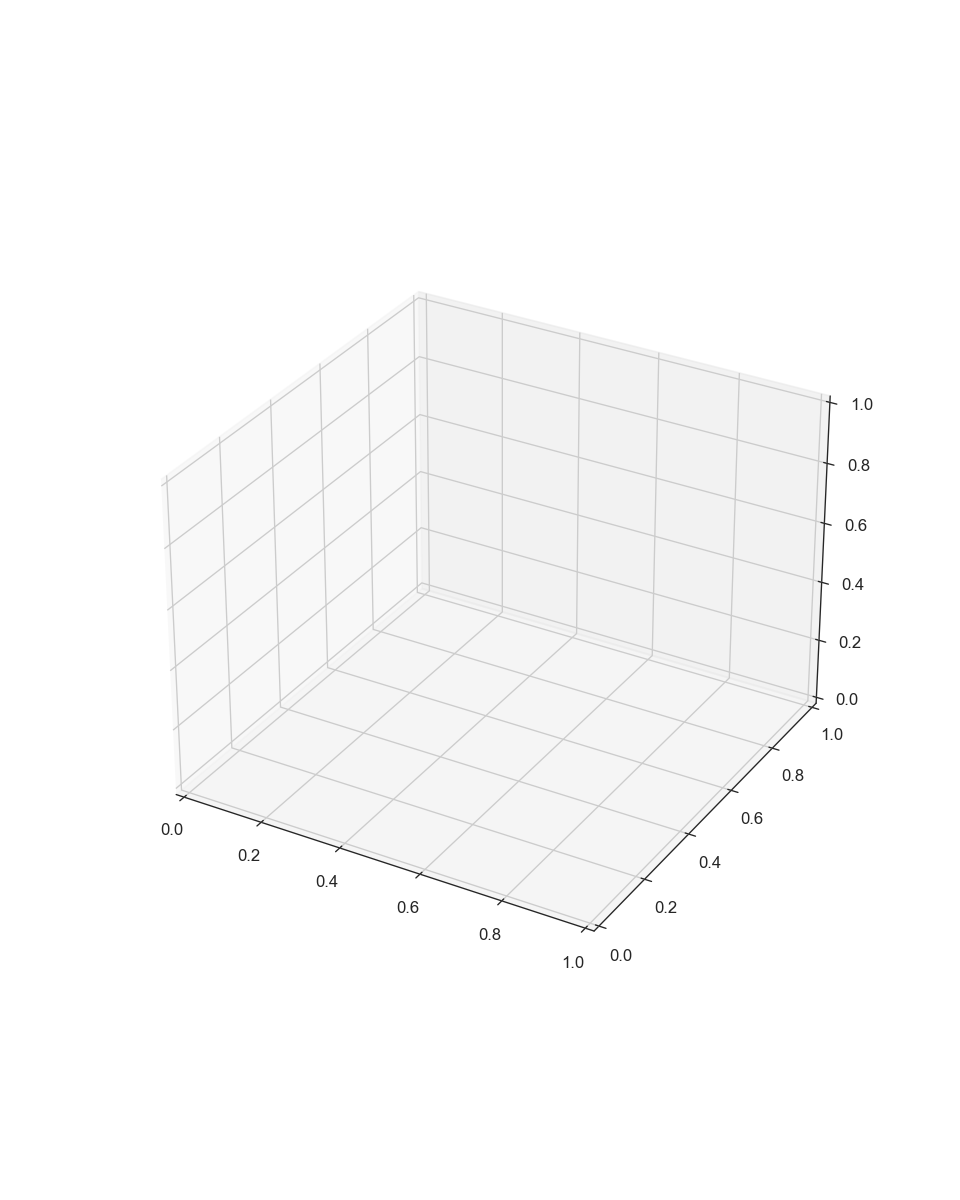

NameError: name 'df' is not defined

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

# Define a color map for the clusters
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Iterate through clusters and plot points with different colors and annotations
for i, cluster in enumerate(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(
        cluster_data.Age,
        cluster_data["Annual Income (k$)"],
        cluster_data["Spending Score (1-100)"],
        c=colors[i],
        s=60,
        label=f'Cluster {cluster}'
    )
    
    # Customize the text label for each cluster
    cluster_label = f'Cluster {cluster}: Custom Text {i + 1}'
    for j in range(len(cluster_data)):
        ax.text(
            cluster_data.Age.iloc[j],
            cluster_data["Annual Income (k$)"].iloc[j],
            cluster_data["Spending Score (1-100)"].iloc[j],
            cluster_label,
            fontsize=10,
            color='black',
            ha='left',
            va='bottom'
        )

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()


In [34]:
df_pizza_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


<IPython.core.display.Javascript object>


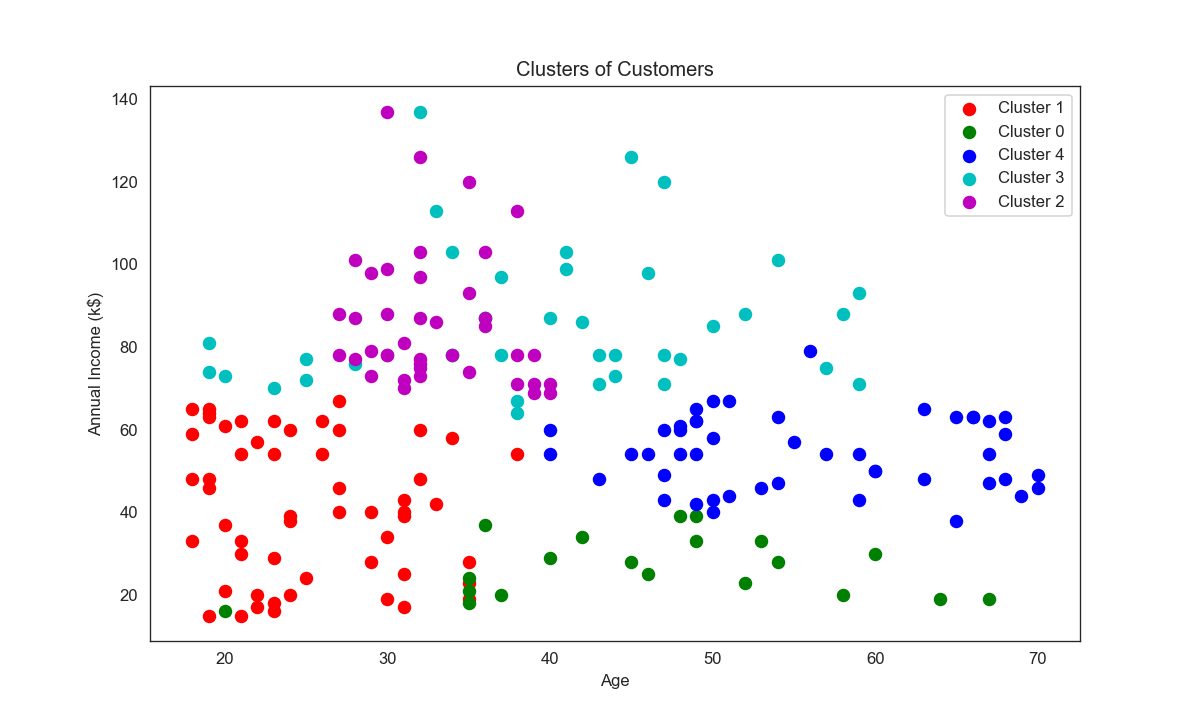

In [35]:
# df = pd.DataFrame(data)

# Create a list of unique clusters in your DataFrame
unique_clusters = df_pizza_customers['Cluster'].unique()

# Define colors for each cluster
colors = ['r', 'g', 'b', 'c', 'm']

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
for cluster, color in zip(unique_clusters, colors):
    cluster_data = df_pizza_customers[df_pizza_customers['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Age'],
        cluster_data['Annual Income (k$)'],
        c=color,
        label=f'Cluster {cluster}',
        s=50  # Marker size
    )

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Clusters of Customers')
plt.legend()

# Show the plot
plt.show()

<h3>Exercise 2</h3>

__As an outcome of Exercise 1, you will obtain clusters in the given dataset.__

__•	Apply appropriate labels to those clusters after careful look at the points belonging to those clusters.<br> 
&emsp; o	Explain your logic behind nomenclature of the clusters. Show the sample dataset.__  

0 Low Income & Low Spending Group <br>
1 High Spending Young Group <br>
2 High Income & High Spending mid Age Group<br>
3 High Income & Low Spending Group<br>
4 Mid Income & mid Spending Aged Group<br>

__•	Based on this segmentation, think of some marketing offers that can be given to the customers. <br> 
&emsp; o	Briefly explain the logic behind the offers to be made to the various customer categories.__

<h3>Exercise 3</h3>

__Write a Python program that will simulate the movement of existing customers around a mall in near real time fashion.<br>__

•	You can assume that customer’s cell phones are enabling the transfer of location data to your centralized server where it’s stored for further analysis. 

<h4>Assumptions</h4>

* No. of Customers = 5 (small no of Customers are taken to display their live location more clearly). <br>
* Positions of all customers are generated & changed randomly after every second.
* Dynamic Graphs are plotted for each customers displaying their co-ordinates along with distance from mall.

In [26]:
import Kafka_Producer, Kafka_Consumer, Working_with_mongoDB
# import Kafka_Producer.ipynb as Kafka_Producer, Kafka_Consumer.ipynb as Kafka_Consumer

In [27]:
from Kafka_Producer import delivery_report,  produce_messages, send_data_to_kafka_via_producer

In [28]:
from Kafka_Consumer import process_message, consume_messages, consume_data_from_kafka_via_producer

In [29]:
from Working_with_mongoDB import update_mongoDB

<IPython.core.display.Javascript object>


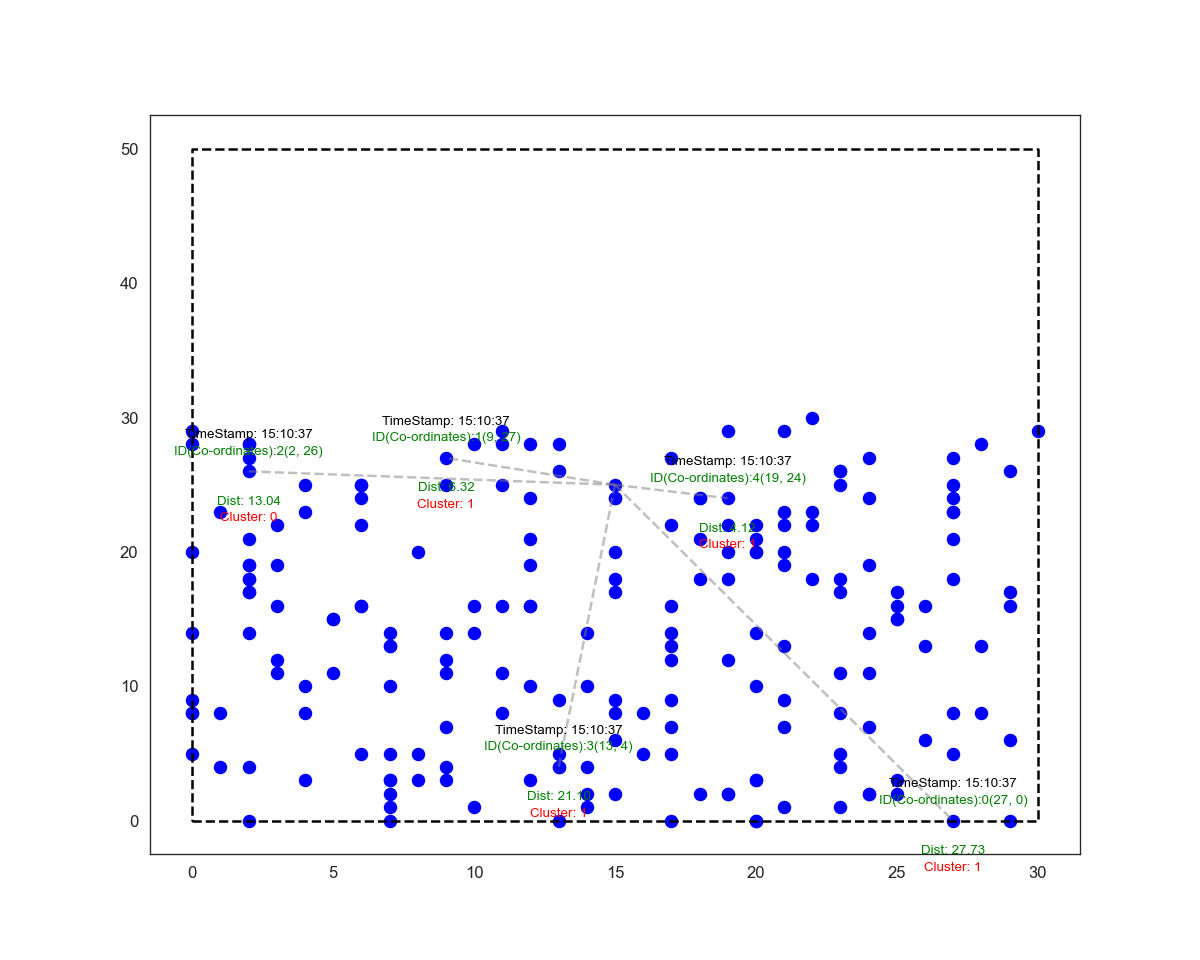

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
from datetime import datetime
from IPython.display import display, clear_output
%matplotlib notebook

# Define the mall layout
mall_width = 30
mall_height = 50
mall_position = np.array([mall_width // 2, mall_height // 2])  # Fixed mall position
num_objects = 200 # Number of objects = 200 

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(0, mall_width)
ax.set_ylim(0, mall_height)
ax.set_title("Objects Movement Simulation")

# Initialize plot objects for the object positions
object_plots = ax.scatter([], [], marker='o', color='blue', label='Objects', s=50)

# Show the mall layout (optional)
ax.plot([0, mall_width, mall_width, 0, 0], [0, 0, mall_height, mall_height, 0], color='black', linestyle='--', label='Mall Boundaries')

# Add legend and labels
ax.legend()
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')

# Initial positions of the objects
object_positions = np.random.randint(0, mall_width, size=(num_objects, 2))

# List to store annotation objects
annotations = []

dic_cust = {}

# Annotation for the mall position
mall_annotation = ax.annotate("Mall", mall_position, textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

# Initialize timestamps
timestamps = [datetime.now()] * num_objects


# Animation update function
def update(frame = 1):
    global object_positions, annotations
    
    # Simulate objects movement
    for i in range(num_objects):
        dx, dy = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])
        object_positions[i] = np.clip(object_positions[i] + [dx, dy], 0, [mall_width, mall_height])
        timestamps[i] = datetime.now()
    
    # Clear the previous plot
    ax.clear()
    
    # Re-draw the mall boundaries
    ax.plot([0, mall_width, mall_width, 0, 0], [0, 0, mall_height, mall_height, 0], color='black', linestyle='--', label='Mall Boundaries')

    # Update object positions in the plot
    object_plots = ax.scatter(object_positions[:, 0], object_positions[:, 1], marker='o', color='blue', label='Objects', s=50)

    # Update annotation positions
    for i, position in enumerate(object_positions):
        annotation = ax.annotate(f"ID(Co-ordinates):{i}({position[0]}, {position[1]})", position, textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='green')
        annotations.append(annotation)
        
        annotation = ax.annotate(f"TimeStamp: {timestamps[i].strftime('%H:%M:%S')}", position, textcoords="offset points", xytext=(0, 20), ha='center', fontsize=8, color='black')
        annotations.append(annotation)
        
        ax.annotate(f"Cluster: {df_pizza_customers['Cluster'][i]}", position, textcoords="offset points", xytext=(0,-30), ha='center', fontsize=8, color='red')
        
        # Calculate and display dynamic distances
        distance = np.linalg.norm(position - mall_position)
        ax.annotate(f"Dist: {distance:.2f}", position, textcoords="offset points", xytext=(0,-20), ha='center', fontsize=8, color='green')
        
        # Draw dotted lines from mall to objects
        line = plt.Line2D([mall_position[0], position[0]], [mall_position[1], position[1]], linestyle='--', color='gray', alpha=0.5)
        ax.add_line(line)

        
        dic_cust = {
            "customer_id": str(i),
            "coordinates": f"({position[0]}, {position[1]})",
#             "coordinates": str('(' + str(position[0]) + ',' + str(position[1]) + ')'),
            "timestamp": str(timestamps[i]),
            "distanceFromMall": distance,
            "clusterCategory": str(df_pizza_customers['Cluster'][i])
        }
        
        #Function for Producer to create messages to Topic using vanilla Kafka method 
        send_data_to_kafka_via_producer(dic_cust)
        
#         Function to store required customer data in json format to mongoDB.
#         update_mongoDB(dic_cust)
        
        
    
    # Update the mall annotation
    mall_annotation.set_position(mall_position)
#     return dic_cust


            
# Create animation
# animation = FuncAnimation(fig, update, interval=1000)  # 1000 milliseconds = 1 second
animation = FuncAnimation(fig, update, interval=10000)  # 10000 milliseconds = 10 second
# update()

<h3>Exercise 4</h3>

Construct a streaming data pipeline integrating the various technologies, tools and Programmes covered in the course that will harvest this real time data of customer’s movements and produces offers that can be sent on customers mobile devices.<br> 
You can think of various aspects related to streaming data processing such as: <br>
•	Real time streaming data ingestion<br>
•	Data’s intermittent storage<br>
•	Data preprocessing – cleaning, transformations etc. <br>
•	Data processing – filters, joins, windows etc. <br>
•	Business logic for placing the offers<br>
•	Final representation of the outcome<br>

<h3>Kafka Stream Processing in Python using Faust</h3>

In [31]:
# import faust

# app=faust.App('demo-streaming',broker='localhost:9092')
# # topic = app.topic('spa_assignment_topic', value_type=str,value_serializer='raw')

In [32]:
# @app.agent(topic)
# async def processor(stream):
#     async for message in stream:
#         print(f'Received {message}')